# Descriptive Analysis of OULAD dataset

In [1]:
from tools.load_oulad import (assessments_df, courses_df, studentAssessment_df, 
                              studentInfo_df, studentRegistration_df, studentVle_df, 
                              vle_df, dataset_dict)
import tools.filter_oulad as filter_oulad

In [2]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sns

%matplotlib inline
sns.set()
pd.options.display.max_columns = None

### Inspecting assessments table

In [3]:
display(assessments_df)
print(assessments_df.info())
display(assessments_df.describe())
for col in ['code_module', 'code_presentation', 'assessment_type']:
    print('%s FREQUENCIES' % (col))
    print(assessments_df[col].value_counts(dropna=False))
    print('')

print('\nTHE SKEW')
print(assessments_df.drop(['id_assessment'], axis=1).skew().sort_values())
print('\nTHE KURTOSIS')
print(assessments_df.drop(['id_assessment'], axis=1).kurt().sort_values())

# some exam final submission dates are NaN = "" does it means at the end of the course?

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB
None


,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


code_module FREQUENCIES
FFF    52
BBB    42
DDD    35
GGG    30
CCC    20
EEE    15
AAA    12
Name: code_module, dtype: int64

code_presentation FREQUENCIES
2014J    57
2014B    57
2013J    53
2013B    39
Name: code_presentation, dtype: int64

assessment_type FREQUENCIES
TMA     106
CMA      76
Exam     24
Name: assessment_type, dtype: int64


THE SKEW
date     -0.256035
weight    1.961551
dtype: float64

THE KURTOSIS
date     -1.368622
weight    2.586504
dtype: float64


### Inspecting courses table

In [4]:
display(courses_df)
print(courses_df.info())
display(courses_df.describe())
for col in ['code_module', 'code_presentation', 'module_presentation_length']:
    print('%s FREQUENCIES' % (col))
    print(courses_df[col].value_counts(dropna=False))
    print('')

print(courses_df['module_presentation_length'].value_counts(dropna=False))
print('\nTHE SKEW')
print(courses_df.skew().sort_values())
print('\nTHE KURTOSIS')
print(courses_df.kurt().sort_values())

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes
None


,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


code_module FREQUENCIES
DDD    4
BBB    4
FFF    4
GGG    3
EEE    3
CCC    2
AAA    2
Name: code_module, dtype: int64

code_presentation FREQUENCIES
2014J    7
2014B    6
2013J    6
2013B    3
Name: code_presentation, dtype: int64

module_presentation_length FREQUENCIES
241    5
269    5
268    4
240    3
262    2
261    2
234    1
Name: module_presentation_length, dtype: int64

241    5
269    5
268    4
240    3
262    2
261    2
234    1
Name: module_presentation_length, dtype: int64

THE SKEW
module_presentation_length   -0.326943
dtype: float64

THE KURTOSIS
module_presentation_length   -1.876775
dtype: float64


### Inspecting studentAssessment table

In [5]:
display(studentAssessment_df)
print(studentAssessment_df.info())
display(studentAssessment_df.describe())
print('is_banked FREQUENCIES')
print(studentAssessment_df['is_banked'].value_counts(dropna=False))
print('\nTHE SKEW')
print(studentAssessment_df.drop(['id_student', 'id_assessment'], axis=1).skew().sort_values())
print('\nTHE KURTOSIS')
print(studentAssessment_df.drop(['id_student', 'id_assessment'], axis=1).kurt().sort_values())

# score sometimes NaN - not even tried?
# we can't replace those with 0 as it would mean they tried and scored 0 which is different...
# may be -0.01?

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB
None


,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


is_banked FREQUENCIES
0    172003
1      1909
Name: is_banked, dtype: int64

THE SKEW
score            -1.075661
date_submitted    0.178825
is_banked         9.386891
dtype: float64

THE KURTOSIS
date_submitted    -0.892050
score              1.529458
is_banked         86.114709
dtype: float64


### Inspecting studentInfo table

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              32593 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB
None


,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


gender FREQUENCIES
M    17875
F    14718
Name: gender, dtype: int64

disability FREQUENCIES
N    29429
Y     3164
Name: disability, dtype: int64

age_band FREQUENCIES
0-35     22944
35-55     9433
55<=       216
Name: age_band, dtype: int64

code_presentation FREQUENCIES
2014J    11260
2013J     8845
2014B     7804
2013B     4684
Name: code_presentation, dtype: int64

final_result FREQUENCIES
Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64

highest_education FREQUENCIES
A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
Name: highest_education, dtype: int64

code_module FREQUENCIES
BBB    7909
FFF    7762
DDD    6272
CCC    4434
EEE    2934
GGG    2534
AAA     748
Name: code_module, dtype: int64

num_of_prev_attempts FREQUENCIES
0    28421
1     3299
2      675
3      142
4       39
5  

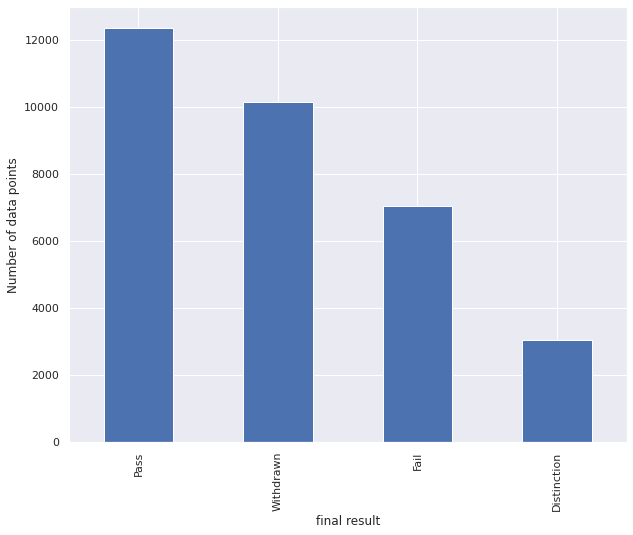

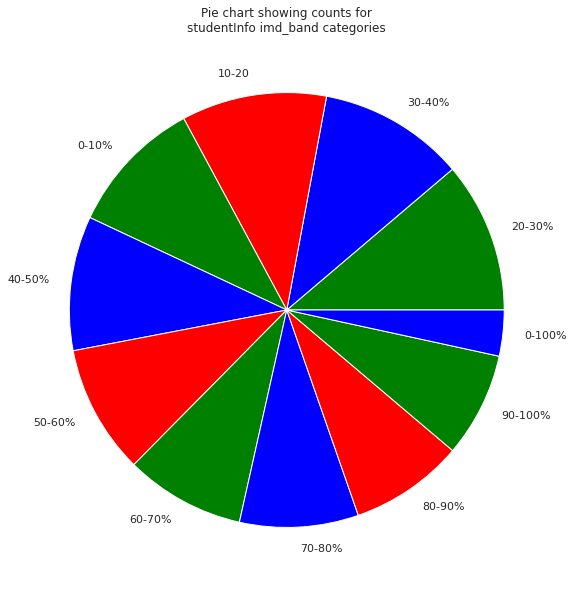

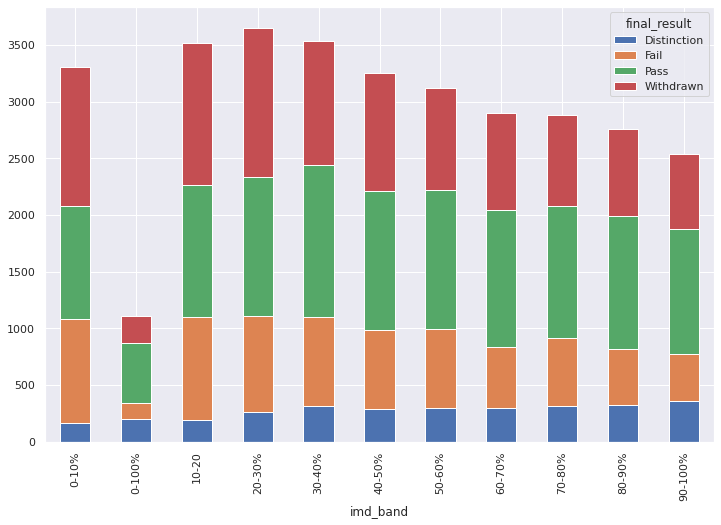

In [6]:
display(studentInfo_df)
print(studentInfo_df.info())
display(studentInfo_df.describe())
for col in ['gender', 'disability', 'age_band', 'code_presentation', 'final_result', 'highest_education', 'code_module', 'num_of_prev_attempts', 'imd_band', 'region', 'studied_credits']:
    print('%s FREQUENCIES' % (col))
    print(studentInfo_df[col].value_counts(dropna=False))
    print('')
    
print('THE SKEW')
print(studentInfo_df.drop(['id_student'], axis=1).skew().sort_values())
print('\nTHE KURTOSIS')
print(studentInfo_df.drop(['id_student'], axis=1).kurt().sort_values())

plt.figure(figsize=(10,8))
studentInfo_df['final_result'].value_counts(dropna=False).plot(kind='bar')
plt.ylabel('Number of data points')
plt.xlabel('final result')
plt.show()

counts = studentInfo_df['imd_band'].value_counts(dropna=False)
plt.figure(figsize=(10,10))
plt.pie(counts, labels=counts.index, colors=['green', 'blue', 'red'])
plt.title('Pie chart showing counts for\nstudentInfo imd_band categories')
plt.show()

sns.set()
studentInfo_df.groupby(['imd_band','final_result']).size().unstack().plot(kind='bar', stacked=True, figsize=(12,8))
plt.show()

# note - we have students that have both - succeed and failed if we don't groupby session

### Inspecting studentRegistration table

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB
None


,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


code_presentation FREQUENCIES
2014J    11260
2013J     8845
2014B     7804
2013B     4684
Name: code_presentation, dtype: int64

code_module FREQUENCIES
BBB    7909
FFF    7762
DDD    6272
CCC    4434
EEE    2934
GGG    2534
AAA     748
Name: code_module, dtype: int64

THE SKEW
date_registration     -1.008369
date_unregistration    0.245486
id_student             2.454250
dtype: float64

THE KURTOSIS
date_unregistration   -0.061019
date_registration      1.001812
id_student             5.200364
dtype: float64

fun fact: registration date positively correlated with unregistration date


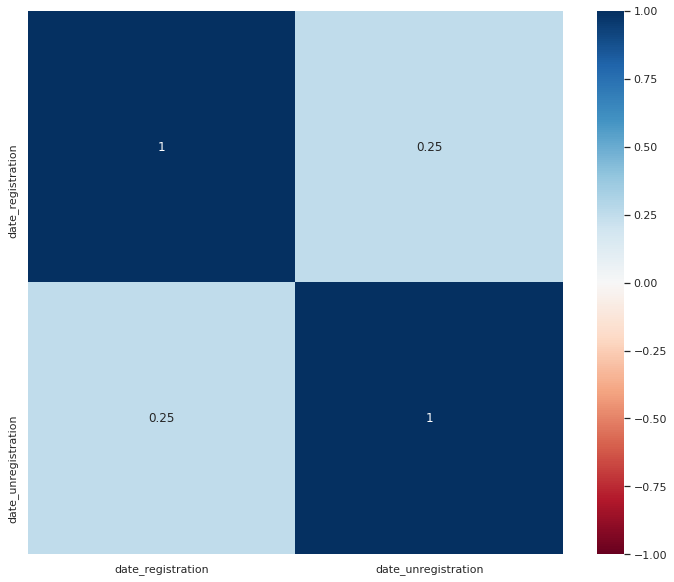

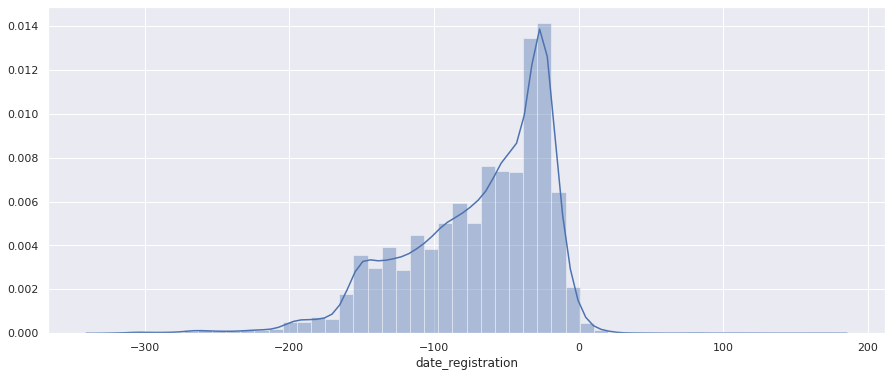

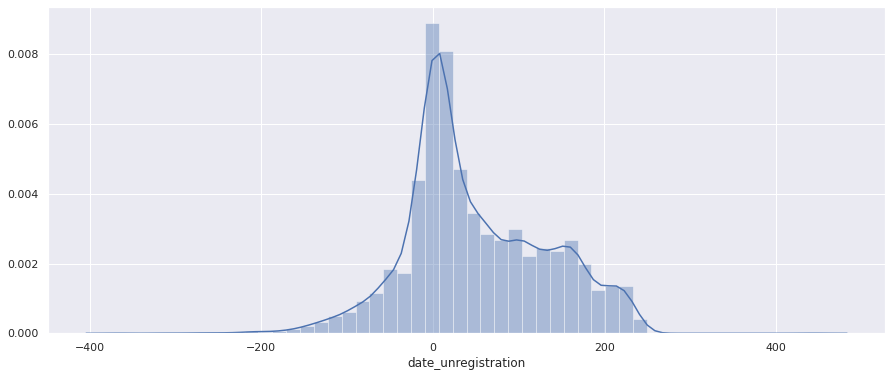

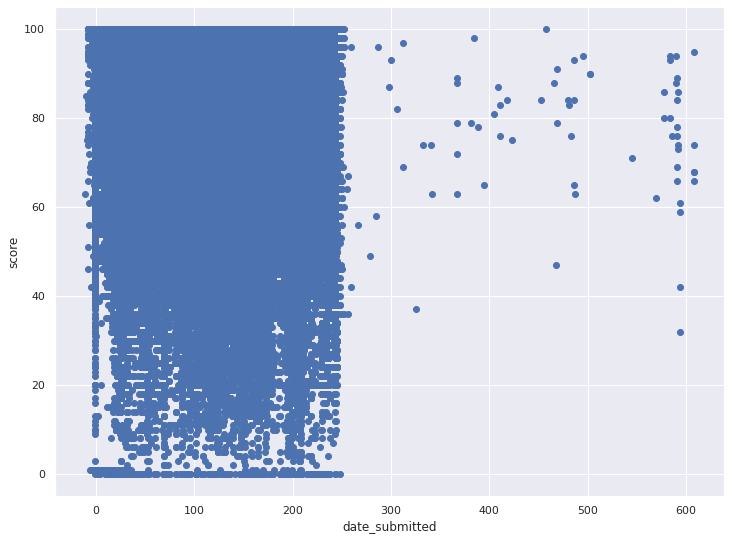

In [7]:
display(studentRegistration_df)
print(studentRegistration_df.info())
display(studentRegistration_df.describe())
for col in ['code_presentation', 'code_module']:
    print('%s FREQUENCIES' % (col))
    print(studentRegistration_df[col].value_counts(dropna=False))
    print('')

print('THE SKEW')
print(studentRegistration_df.skew().sort_values())
print('\nTHE KURTOSIS')
print(studentRegistration_df.kurt().sort_values())

print('\nfun fact: registration date positively correlated with unregistration date')
plt.figure(figsize = (12,10))
sns.heatmap(studentRegistration_df.drop(['id_student'], axis=1).corr(), annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.show()

plt.figure(figsize=(15,6))
sns.distplot(studentRegistration_df['date_registration'])
plt.show()
plt.figure(figsize=(15,6))
sns.distplot(studentRegistration_df['date_unregistration'])
plt.show()

plt.figure(figsize=(12,9))
plt.scatter(x=studentAssessment_df['date_submitted'], y=studentAssessment_df['score'])
plt.xlabel('date_submitted')
plt.ylabel('score')
plt.show()
# 2/3 of date_unregistration is NaN - they dont unRegistered!
# Is it common to unregister at the very end of the course? If not we can replace the NaNs 
# with the end date of the course!
# 45 date_registration is NaN - no Idea why...

### Inspecting studentVle table
(10M rows with 6 columns - this might take a couple of seconds...)

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB
None


,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


code_presentation FREQUENCIES
2014J    3619452
2013J    2988784
2014B    2160176
2013B    1886868
Name: code_presentation, dtype: int64

code_module FREQUENCIES
FFF    4014499
DDD    2166486
BBB    1567564
CCC    1207827
EEE     961433
GGG     387173
AAA     350298
Name: code_module, dtype: int64

THE SKEW
date           0.337181
sum_click    122.920996
dtype: float64

THE KURTOSIS
date            -1.146259
sum_click    66447.907210
dtype: float64


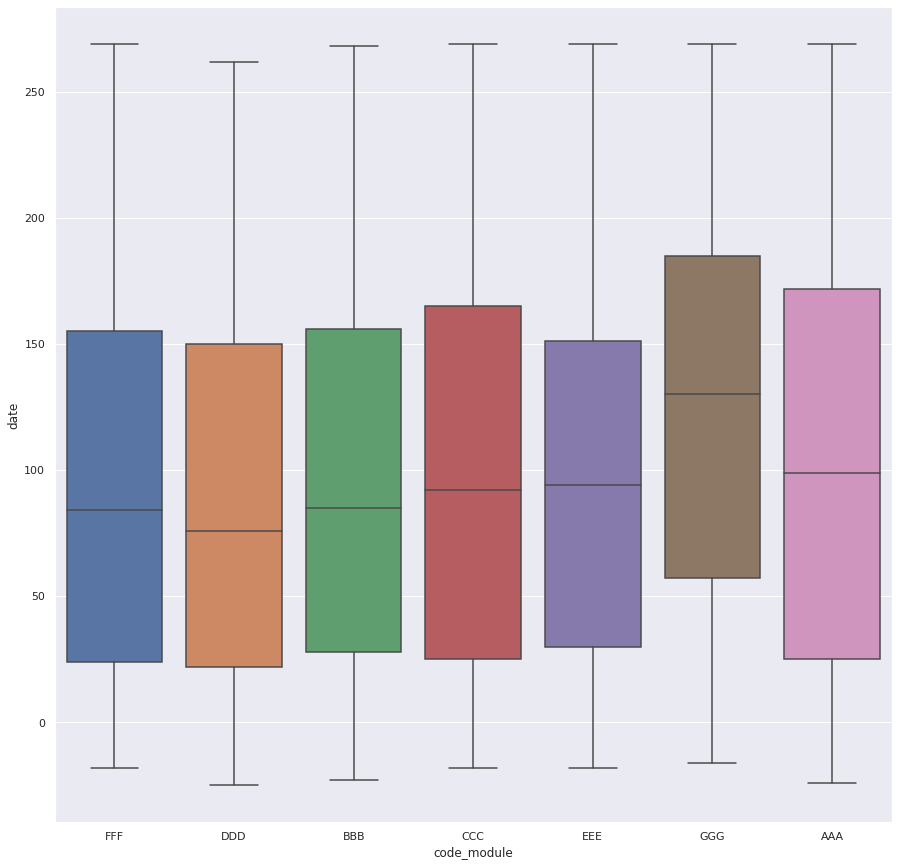

In [8]:
display(studentVle_df)
print(studentVle_df.info())
display(studentVle_df.describe())
for col in ['code_presentation', 'code_module']:
    print('%s FREQUENCIES' % (col))
    print(studentVle_df[col].value_counts(dropna=False))
    print('')

print('THE SKEW')
print(studentVle_df.drop(['id_student', 'id_site'], axis=1).skew().sort_values())
print('\nTHE KURTOSIS')
print(studentVle_df.drop(['id_student', 'id_site'], axis=1).kurt().sort_values())

plt.figure(figsize=(15, 15))
sns.boxplot(
    x='code_module', y="date",
    data=studentVle_df, order=studentVle_df['code_module'].value_counts().index)
plt.show()

### Inspecting vle table

In [9]:
display(vle_df)
print(vle_df.info())
for col in ['code_presentation', 'code_module', 'activity_type']:
    print('%s FREQUENCIES' % (col))
    print(vle_df[col].value_counts(dropna=False))
    print('')

,id_site,code_module,code_presentation,activity_type
0,546943,AAA,2013J,resource
1,546712,AAA,2013J,oucontent
2,546998,AAA,2013J,resource
3,546888,AAA,2013J,url
4,547035,AAA,2013J,resource
...,...,...,...,...
6359,897063,GGG,2014J,resource
6360,897109,GGG,2014J,resource
6361,896965,GGG,2014J,oucontent
6362,897060,GGG,2014J,resource


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_site            6364 non-null   int64 
 1   code_module        6364 non-null   object
 2   code_presentation  6364 non-null   object
 3   activity_type      6364 non-null   object
dtypes: int64(1), object(3)
memory usage: 199.0+ KB
None
code_presentation FREQUENCIES
2013J    1772
2014B    1671
2014J    1670
2013B    1251
Name: code_presentation, dtype: int64

code_module FREQUENCIES
FFF    1967
DDD    1708
BBB    1154
CCC     419
AAA     413
GGG     367
EEE     336
Name: code_module, dtype: int64

activity_type FREQUENCIES
resource          2660
subpage           1055
oucontent          996
url                886
forumng            194
quiz               127
page               102
oucollaborate       82
questionnaire       61
ouwiki              49
dataplus            28
externalqu

In [10]:
# this part in not needed anymore as we choose to remove week_from & week_to
# print('\nfun fact: week_from correlated with week_to')
# plt.figure(figsize = (12,10))
# sns.heatmap(vle_df.drop(['id_site'], axis=1).corr(), annot=True, cmap="RdBu", vmin=-1, vmax=1)
# plt.show()

# countFromNotEqualTo = sum(vle_df['week_from'][~vle_df['week_from'].isna()] != vle_df['week_to'][~vle_df['week_to'].isna()])
# print('only %i times from total %i the week_from is different from week_to' % (countFromNotEqualTo, sum(~vle_df['week_from'].isna())))

# 5243 of week_from and week_to is NaN = planed availability from start to end
# we could replace week_from with 0 and week_to with end date of the course

# the nullity matrix:
# nullable_columns = vle_df.columns[data.isna().any()].tolist()
# msno.matrix(vle_df[nullable_columns])
# plt.show() # black is non-null / white is null

## Joining tables to make stats by course/student

,score_mean,score_sum,date_submitted_mean,is_banked_sum,assessment_type_CMA_count,assessment_type_TMA_count,date_mean,weight_mean,weight_sum,gender_first,region_first,highest_education_first,imd_band_first,age_band_first,num_of_prev_attempts_first,studied_credits_first,disability_first,final_result_first,date_registration_first,date_unregistration_first,sum_click_mean,sum_click_sum,activity_type_subpage,activity_type_url,activity_type_homepage,activity_type_resource,activity_type_oucontent,activity_type_quiz,activity_type_forumng,activity_type_oucollaborate
id_student,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
28418,0.0,0.0,-1.0,0.0,0,0,9.027027,0.0,0.0,F,West Midlands Region,A Level or Equivalent,20-30%,0-35,0,30,N,Fail,-37.0,241.0,2.000000,74.0,16,1,4,10,1,5,0,0
29764,0.0,0.0,-1.0,0.0,0,0,-1.878788,0.0,0.0,M,East Anglian Region,A Level or Equivalent,50-60%,0-35,0,90,N,Distinction,-34.0,241.0,4.848485,160.0,6,3,8,2,6,7,1,0
29820,0.0,0.0,-1.0,0.0,0,0,1.578947,0.0,0.0,M,East Anglian Region,HE Qualification,40-50%,0-35,0,60,N,Pass,-57.0,241.0,1.644737,125.0,15,2,15,26,2,3,13,0
40333,0.0,0.0,-1.0,0.0,0,0,1.573770,0.0,0.0,M,North Region,HE Qualification,0-10%,35-55,0,30,N,Withdrawn,-30.0,17.0,2.360656,144.0,17,7,13,12,3,5,4,0
40604,0.0,0.0,-1.0,0.0,0,0,-5.242424,0.0,0.0,M,Ireland,A Level or Equivalent,0-100%,35-55,0,30,N,Pass,-17.0,241.0,1.772727,117.0,21,3,16,12,7,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681198,0.0,0.0,-1.0,0.0,0,0,-6.363636,0.0,0.0,M,East Anglian Region,Lower Than A Level,70-80%,35-55,0,90,N,Withdrawn,-225.0,133.0,2.136364,47.0,4,1,7,4,2,4,0,0
2686578,0.0,0.0,-1.0,0.0,0,0,4.458333,0.0,0.0,M,Scotland,A Level or Equivalent,60-70%,0-35,0,90,N,Distinction,-23.0,241.0,1.166667,28.0,6,1,4,8,1,4,0,0
2692327,0.0,0.0,-1.0,0.0,0,0,-7.690909,0.0,0.0,M,North Region,A Level or Equivalent,0-100%,35-55,0,60,N,Distinction,-25.0,241.0,2.500000,275.0,58,9,12,19,1,10,1,0


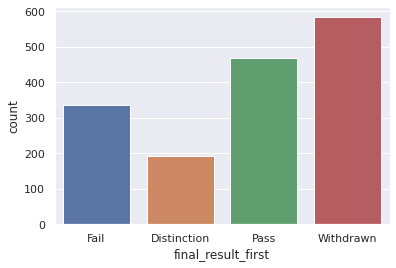

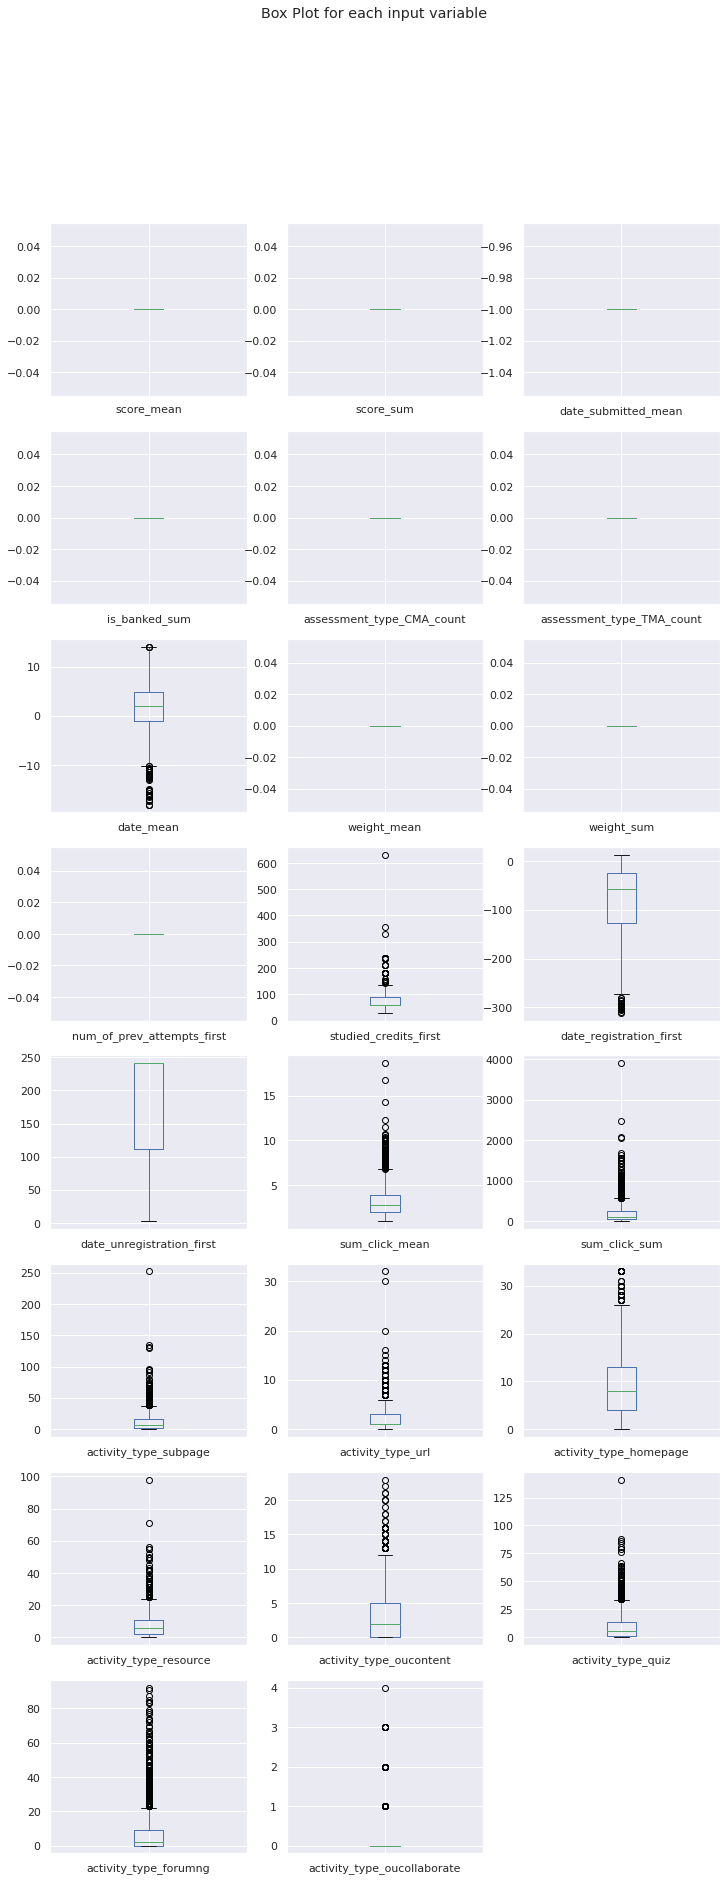

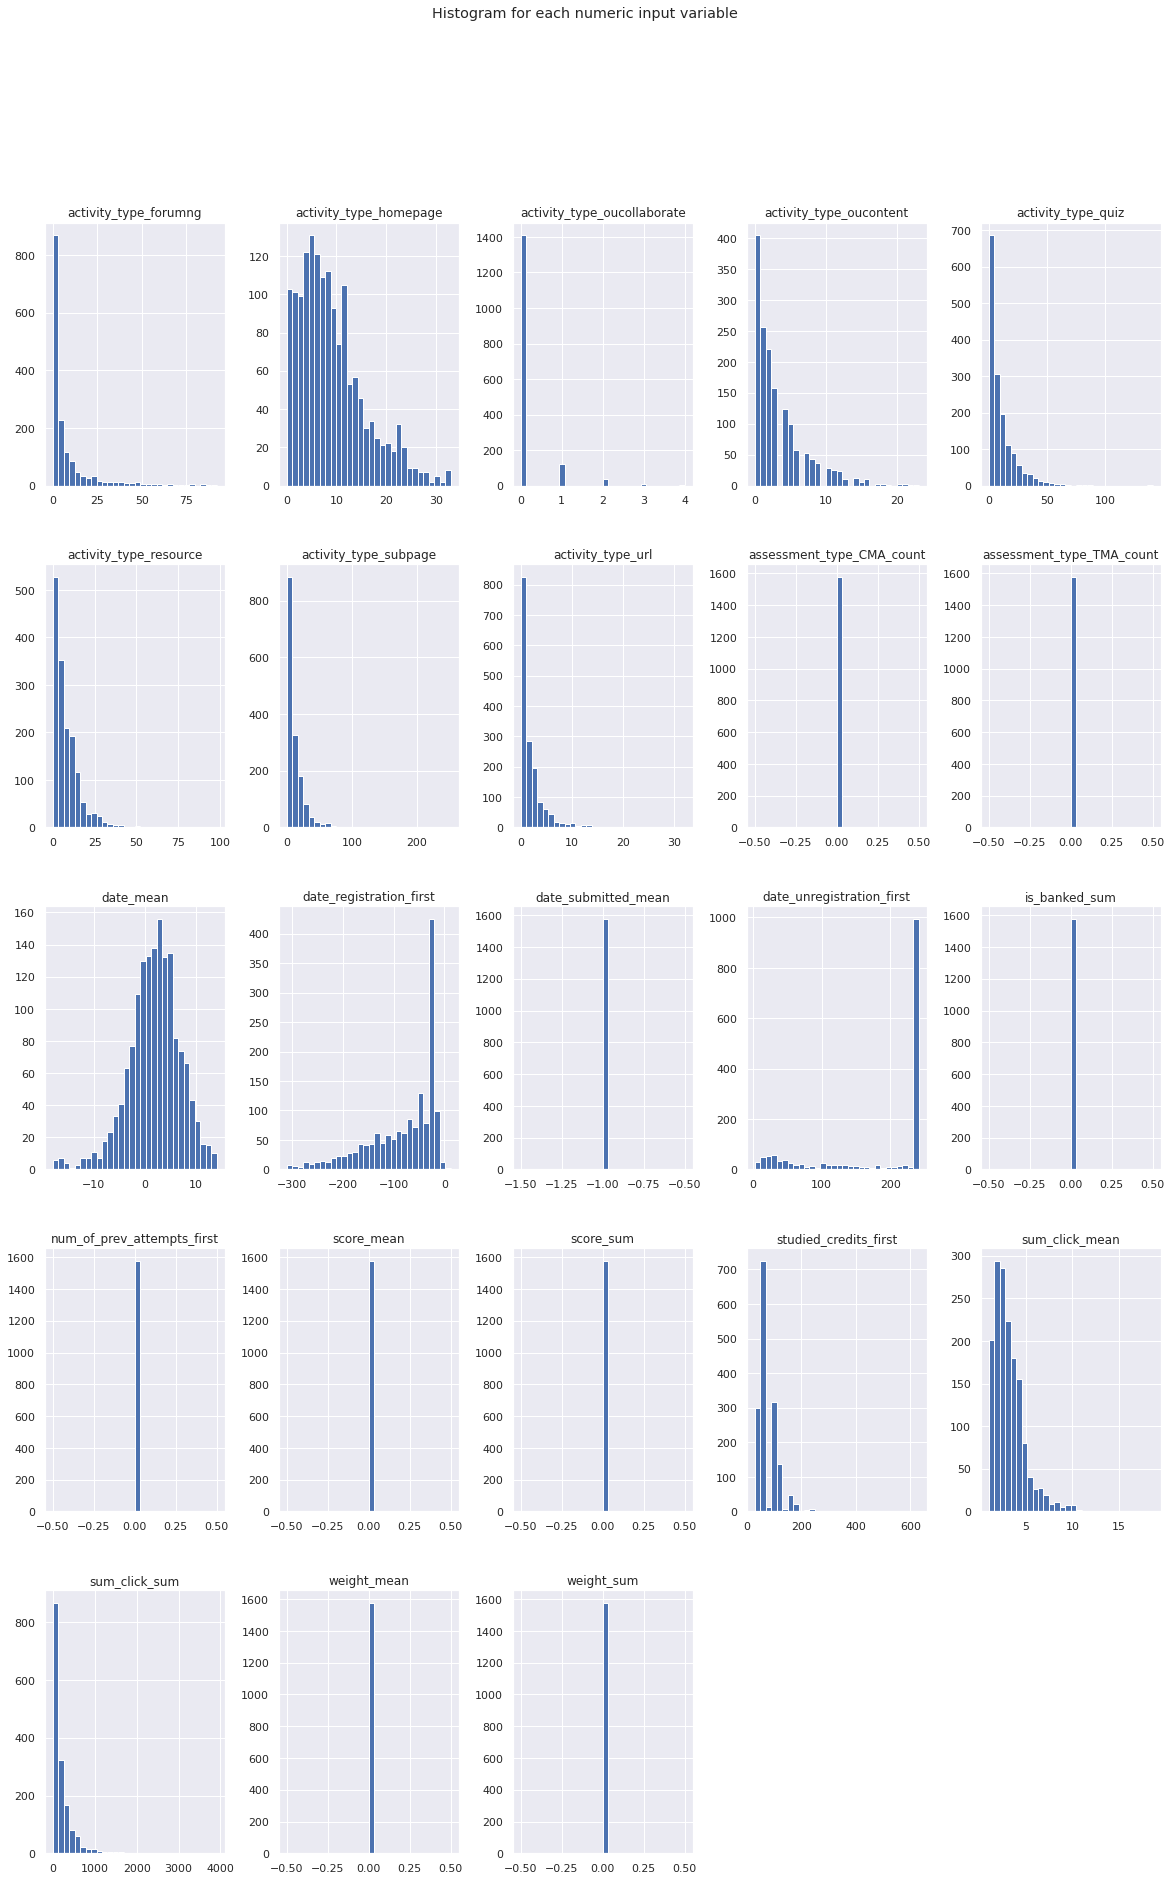

In [11]:
code_module = 'CCC'
code_presentation = '2014B'
oneCourse = filter_oulad.getOneCourse(dataset_dict, code_module, code_presentation)
final_df = filter_oulad.restructure(oneCourse, 14)
encoders = filter_oulad.cleanAndMap(final_df, encode=False)
display(final_df)
sns.countplot(final_df['final_result_first'],label="Count")
plt.show()

final_df.drop(['region_first', 'highest_education_first', 'final_result_first'], axis=1)\
    .plot(kind='box', subplots=True, layout=(8,3),
          sharex=False, sharey=False, figsize=(12,30), title='Box Plot for each input variable')
plt.show()

final_df.drop(['region_first', 'highest_education_first', 'final_result_first'] ,axis=1)\
    .hist(bins=30, figsize=(20,30))
pl.suptitle("Histogram for each numeric input variable")
plt.show()

# from pandas.plotting import scatter_matrix
# from matplotlib import cm
# X = final_df.drop(['region_first', 'highest_education_first', 'final_result_first'] ,axis=1)
# y = final_df['final_result_first'].astype('category').cat.codes
# cmap = cm.get_cmap('gnuplot')
# scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(60,60), cmap = cmap)
# plt.suptitle('Scatter-matrix for each input variable')
# plt.savefig("save_file_name.pdf")
# plt.close()